# CIS 5450 Homework 2: SQL
## Due: Thursday, October 13rd 2022, 10pm EST 
### Worth 100 points in total

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a Spotify dataset containing song reviews and statistics. We will also conduct some text analysis of song reviews.

 <!-- We will finish off the homework with some text analysis. -->

We are introducing a lot of new things in this homework, and this is often where students start to get lost. Thus, we **strongly** encourage you to review the slides/material as you work through this assignment. 

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the pinned FAQ post on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [213]:
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0
!pip install pandasql

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [214]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [215]:
# Three datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_features.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_songs.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_rankings.csv

File ‘spotify_features.csv’ already there; not retrieving.

File ‘spotify_songs.csv’ already there; not retrieving.

File ‘spotify_rankings.csv’ already there; not retrieving.



In [216]:
print(pd.__version__ )

1.3.5


### PennGrader Setup

In [217]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 87368675 # YOUR PENN-ID GOES HERE AS AN INTEGER #

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

In [218]:
%%writefile config.yaml

grader_api_url: 'https://wyv616tp17.execute-api.us-east-1.amazonaws.com/default/Grader'
grader_api_key: 'Kd32fl3g3p917iM0zwjiO23Bitj4PO9ga4LektOa'

Overwriting config.yaml


In [219]:
grader = PennGrader('config.yaml', 'CIS_5450_Fall22_HW2', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 87368675

Make sure this correct or we will not be able to store your grade




# Music for everyone!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/3/33/Spotify_logo13.png" width= "500" align ="center"/></center>
<br>

We'll be working with a dataset containing Top Tracks on Spotify in 2017, along with their reviews and rankings.

In this homework, we'll be exploring the following attributes of the song data:

*   Song-specific metadata (eg. artist name) 

*   The songs' rankings based on date and listener location

*   Acoustic / musical properties of the song, eg. danceability


We'll be loading this data into various dataframes and querying them. We will primarily be using PandaSQL for these tasks. However, for some of the initial questions, we'll ask you to perform the same operations in Pandas. The purpose of conducting the same tasks in both Pandas and PandaSQL is to help you become more familiar with the similarites and differences of these two tools.

## Part 1: Load & Process our Datasets [9 points total]

Before we get into the data, we first need to load and clean our datasets. 

# Metadata
You'll be working with three CSV files:
- `spotify_features.csv`
- `songs_features.csv`
- `spotify_rankings.csv`

The file `spotify_features.csv` contains musical / acoustic data for each song, obtained via the Spotify API.

The file `songs_features.csv` includes the names, artists, Spotify URLs of the Top Songs of 2017. 

Each row in the file `spotify_rankings.csv` contains a song's ranking on a specific day in a particular region, where regions are sorted alphabetically.

For example, the first 200 rows of `spotify_rankings.csv` represent the ranks of various songs on 1st of January in Argentina. The next 200 rows contain the  rankings of songs during the 2nd of January in Argentina. 

Note that the Spotify dataset may containing missing data, so don't rely on the interval between successive dates as 200 rows. 

Instead, it would be preferable to read all the data and then filter by region & date. This way, you can be sure that you have the required data.


**TODO**:
* Load `spotify_songs.csv` and save the data to a dataframe called `songs_df`.
* Load `spotify_rankings.csv` and save the data to a dataframe called `rankings_df`.
* Load `spotify_features.csv` and save the data to a dataframe called `features_df` without the index column being included.

**Note**: If you see a column called `Unnamed: 0` when loading the data,be sure to drop this column while loading the dataset. This is necessary for one to receive full credit in all the following parts of this homework.

In [220]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly! 
songs_df = pd.read_csv("/content/spotify_songs.csv")
rankings_df = pd.read_csv("/content/spotify_rankings.csv")
features_df = pd.read_csv("/content/spotify_features.csv")

In [221]:
# view songs_df to make sure the import was successful
songs_df

id                                name  \
0   7qiZfU4dY1lWllzX7mPBI                        Shape of You   
1   5CtI0qwDJkDQGwXD1H1cL                   Despacito - Remix   
2   4aWmUDTfIPGksMNLV2rQP  Despacito (Featuring Daddy Yankee)   
3   6RUKPb4LETWmmr3iAEQkt            Something Just Like This   
4   3DXncPQOG4VBw3QHh3S81                         I'm the One   
..                    ...                                 ...   
95  1PSBzsahR2AKwLJgx8ehB    Bad Things (with Camila Cabello)   
96  0QsvXIfqM0zZoerQfsI9l                   Don't Let Me Down   
97  7mldq42yDuxiUNn08nvzH               Body Like A Back Road   
98  7i2DJ88J7jQ8K7zqFX2fW                        Now Or Never   
99  1j4kHkkpqZRBwE0A4CN4Y         Dusk Till Dawn - Radio Edit   

              artists  duration_ms  time_signature  \
0          Ed Sheeran       233713               4   
1          Luis Fonsi       228827               4   
2          Luis Fonsi       228200               4   
3    The Chainsmokers       247160               4   
4           DJ Khaled       288600               4   
..                ...          ...             ...   
95  Machine Gun Kelly       239293               4   
96   The Chainsmokers       208053               4   
97           Sam Hunt       165387               4   
98             Halsey       214802               4   
99               ZAYN       239000               4   

                                              reviews  
0                      vocal has a nice warm quality.  
1   Very European feeling. I like that the singer ...  
2   Unique and quirky. Arrangement was good and ni...  
3   Tastefully put together song. Good instrumenta...  
4                               Your voice is awesome  
..                                                ...  
95                                  Good strong voice  
96                             good movie sound track  
97                    Good melody. A little different  
98                                     Good lyrics...  
99  Good hook - unique vocal presentation - I like...  

[100 rows x 6 columns]

In [222]:
# view rankings_df to make sure the import was successful
rankings_df

Unnamed: 0  Position                  Track Name              Artist  \
0                 0         1  Reggaetón Lento (Bailemos)                CNCO   
1                 1         2                    Chantaje             Shakira   
2                 2         3   Otra Vez (feat. J Balvin)       Zion & Lennox   
3                 3         4                Vente Pa' Ca        Ricky Martin   
4                 4         5                      Safari            J Balvin   
...             ...       ...                         ...                 ...   
3441192     3441192       196          More Than You Know  Axwell /\ Ingrosso   
3441193     3441193       197                      Issues      Julia Michaels   
3441194     3441194       198                 Tuo Fei Lun          Eason Chan   
3441195     3441195       199                          面具          Alfred Hui   
3441196     3441196       200                  Let Her Go           Passenger   

         Streams                                                URL  \
0          19272  https://open.spotify.com/track/3AEZUABDXNtecAO...   
1          19270  https://open.spotify.com/track/6mICuAdrwEjh6Y6...   
2          15761  https://open.spotify.com/track/3QwBODjSEzelZyV...   
3          14954  https://open.spotify.com/track/7DM4BPaS7uofFul...   
4          14269  https://open.spotify.com/track/6rQSrBHf7HlZjtc...   
...          ...                                                ...   
3441192     2126  https://open.spotify.com/track/71bBFbfn2OBK5Qw...   
3441193     2117  https://open.spotify.com/track/7vu0JkJh0ldukEY...   
3441194     2112  https://open.spotify.com/track/0pmGleExiQyd0Hx...   
3441195     2102  https://open.spotify.com/track/58SUsgamkW6vFFq...   
3441196     2088  https://open.spotify.com/track/2jyjhRf6DVbMPU5...   

               Date Region  
0        2017-01-01     ec  
1        2017-01-01     ec  
2        2017-01-01     ec  
3        2017-01-01     ec  
4        2017-01-01     ec  
...             ...    ...  
3441192  2018-01-09     hk  
3441193  2018-01-09     hk  
3441194  2018-01-09     hk  
3441195  2018-01-09     hk  
3441196  2018-01-09     hk  

[3441197 rows x 8 columns]

In [223]:
# view features_df to make sure the import was successful
features_df

Unnamed: 0                     id  danceability  energy   key  loudness  \
0            0  7qiZfU4dY1lWllzX7mPBI         0.825   0.652   1.0    -3.183   
1            1  5CtI0qwDJkDQGwXD1H1cL         0.694   0.815   2.0    -4.328   
2            2  4aWmUDTfIPGksMNLV2rQP         0.660   0.786   2.0    -4.757   
3            3  6RUKPb4LETWmmr3iAEQkt         0.617   0.635  11.0    -6.769   
4            4  3DXncPQOG4VBw3QHh3S81         0.609   0.668   7.0    -4.284   
..         ...                    ...           ...     ...   ...       ...   
95          95  1PSBzsahR2AKwLJgx8ehB         0.675   0.690   2.0    -4.761   
96          96  0QsvXIfqM0zZoerQfsI9l         0.542   0.859  11.0    -5.651   
97          97  7mldq42yDuxiUNn08nvzH         0.731   0.469   5.0    -7.226   
98          98  7i2DJ88J7jQ8K7zqFX2fW         0.658   0.588   6.0    -4.902   
99          99  1j4kHkkpqZRBwE0A4CN4Y         0.258   0.437  11.0    -6.593   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0    0.0       0.0802        0.5810          0.000000    0.0931   0.9310   
1    1.0       0.1200        0.2290          0.000000    0.0924   0.8130   
2    1.0       0.1700        0.2090          0.000000    0.1120   0.8460   
3    0.0       0.0317        0.0498          0.000014    0.1640   0.4460   
4    1.0       0.0367        0.0552          0.000000    0.1670   0.8110   
..   ...          ...           ...               ...       ...      ...   
95   1.0       0.1320        0.2100          0.000000    0.2870   0.2720   
96   1.0       0.1970        0.1600          0.004660    0.1370   0.4030   
97   1.0       0.0326        0.4630          0.000001    0.1030   0.6310   
98   0.0       0.0367        0.1050          0.000001    0.1250   0.4340   
99   0.0       0.0390        0.1010          0.000001    0.1060   0.0967   

      tempo  
0    95.977  
1    88.931  
2   177.833  
3   103.019  
4    80.924  
..      ...  
95  137.817  
96  159.797  
97   98.963  
98  110.075  
99  180.043  

[100 rows x 13 columns]

### 1.1 Data Preprocessing
We are now going to clean our dataframes `songs_df` and `rankings_df` by performing the following tasks:       
1) fixing columns        
2) changing datatypes             
3) handling nulls.

First, let us view the first few rows of `songs_df`. You may also call `.info()` and check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take during Exploratory Data Analysis (EDA).

In [224]:
# view info information regarding movies_df
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   name            100 non-null    object
 2   artists         100 non-null    object
 3   duration_ms     100 non-null    int64 
 4   time_signature  100 non-null    int64 
 5   reviews         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


#### 1.1.1 Cleaning `songs_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls. With this information, we can now clean our dataframe. 

**TODO**:
* Drop the column `time_signature`.

In [225]:
# TODO: clean songs_df
songs_df.drop('time_signature',axis=1,inplace=True)

In [226]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_songs', answer = songs_df.head())

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2 Processing Rankings

`rankings_df` contains a `URL` column that represents the URL of the Spotify track. This URL contains the track ID. We would like to extract the ID corresponding to each song. 

To maintain consistency, begin by sorting this dataframe according to `Date` in ascending order. 

**TODO**:
- Sort the `Date` column in ascending order
- Split the strings in the `URL` column to extract the ID for each song, and save this as a new column called `ID` in `rankings_df`
- Drop the `URL` column

**Example**:
>URL | ID
>--- | ---
> https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTf | 3AEZUABDXNtecAOSC1qTf

After performing these steps, `rankings_df` should have the following schema:
**Final Schema**:
>Position | Track Name | Artist | Streams | Date | Region | ID
>--- | --- | --- |--- |--- |--- |--- |

**Hint**: Note the delimiter within the URL and consult the documentation for the `.split()` function

In [227]:
# TODO: extract ID and drop URL
rankings_df = rankings_df.sort_values(['Date'], ascending = True)
rankings_df[['ID']] = rankings_df['URL'].str.split('/', n=4, expand = True )[rankings_df['URL'].str.split('/', n=4, expand = True ).columns[[4]]]
rankings_df = rankings_df.drop(columns=['Unnamed: 0', 'URL'])

In [228]:
# 4 points
grader.grade(test_case_id = 'test_rankings_processing', answer = rankings_df.head())

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning `rankings_df`

Now let's clean `rankings_df` and make it usable.

In [229]:
# Examine rankings_df using the .info() function
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   Date        object
 5   Region      object
 6   ID          object
dtypes: int64(2), object(5)
memory usage: 210.0+ MB



**TODO**:
* Drop all rows that have a null value in `rankings_df`
* Convert column `Date` into type `datetime64[ns]`.


In [230]:
#TODO: 
rankings_df =  rankings_df.dropna()
rankings_df['Date'] = pd.to_datetime(rankings_df['Date'])

In [231]:
# 2 points
grader.grade(test_case_id = 'test_cleaning_rankings', answer = [len(rankings_df),rankings_df.head()])

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox 

.info() is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just skip this section (1.2), but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [232]:
# Your EDA here! Feel free to add more cells
rankings_df.describe()

Position       Streams
count  3.440540e+06  3.440540e+06
mean   9.465220e+01  5.188452e+04
std    5.739412e+01  2.017733e+05
min    1.000000e+00  1.001000e+03
25%    4.500000e+01  3.321000e+03
50%    9.200000e+01  9.226000e+03
75%    1.430000e+02  2.965600e+04
max    2.000000e+02  1.138152e+07

## Part 2: Exploring the Data with PandasSQL (and Pandas) [62 points total]

Now that you're more familiar with the dataset, we'll now introduce you to SQL language. Specifically, we'll be using **pandasql**: a library that allows users to query Pandas DataFrames using SQL statements.

The typical flow of using pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

PandaSQL is convenient as it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `songs_df`, `rankings_df` and `features_df` that you have created above!

Given that SQL is a brand new language, we wanted to give you a chance to directly compare the similarities &differences of Pandas and SQL. 
Thus, for each of the simpler queries, we ask that you **perform the tasks in each question twice: once with Pandas and once with PandaSQL**. 

Each answer (unless specified otherwise) will thus require two dataframes, one dataframe whose name is prefixed with `pd_`, and another dataframe whose name is prefixed with `sql_`. You will submit these two dataframes seperately to the autograder. **We will be reviewing your code to make sure your code for each dataframe is written in the correct language.**


###2.1 Bruno Mars songs


#### 2.1.1 How many Bruno Mars' songs were popular in 2017?

Note: Only Pandas is required for this question.
The dataframe `songs_df` contains all top songs in 2017. We want to know whether Bruno Mars was a part of it (he obviously was) - but which of his songs made it to the top?

**TODO:** Using **pandas**, filter out the songs and reviews from `songs_df` that were by `Bruno Mars`. Then, save this data to a DataFrame called `bruno_df` that has the following schema:

>name | reviews
>--- | ---



In [233]:
# TODO: Use pandas to obtain songs by `Bruno Mars`
bruno_df1 = songs_df.loc[songs_df['artists'] == 'Bruno Mars']
bruno_df = bruno_df1[['name', 'reviews']]

In [234]:
# 2 points
grader.grade(test_case_id = 'test_bruno', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 How many of Bruno Mars' songs were deemed "good"?
We now want to see which of these songs contained the word "good" in the `reviews` column.

**TODO:** Using **pandasql**, update `bruno_df` so that it only contains songs that have the word 'good' in the `reviews` column.

In [235]:
# TODO: Use pandasql to obtain only "good" songs of bruno mars
pd_bruno_df = bruno_df[bruno_df['reviews'].str.contains('good')]

In [236]:
good_song_query = "SELECT name, reviews FROM bruno_df WHERE reviews LIKE '%good%'"
sql_brno_df = ps.sqldf(good_song_query, locals())

In [237]:
# 2 points
grader.grade(test_case_id = 'test_good_songs_df', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.2 Finding the hit songs



#### 2.2.1 Extract the total no. of streams
We now want to see what songs formed the top 75% of the year 2017 from `rankings_df`. We can measure the popularity of the songs using the total number of streams the song received.

**TODO**: 
* Find the total number of streams per song and save it into a dataframe called `streams_df`
* Understand the quartile ranges in `streams_df`

**Hint**: you may find it helpful to look up `.describe()` to understand quartiles. It would be helpful to save the necessary quartile value to use in the querying section that follows.




In [238]:
# TODO: Using pandas extract the total number of streams per song from rankings_df
streams_df = rankings_df.groupby(['Track Name'])[['Streams']].sum().reset_index()
streams_df.describe()

Streams
count  1.859700e+04
mean   9.598901e+06
std    6.903221e+07
min    1.001000e+03
25%    2.133400e+04
50%    1.225160e+05
75%    1.072171e+06
max    2.993989e+09

In [239]:
# 2 points
grader.grade(test_case_id = 'test_pd_describe', answer = len(streams_df))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Top 75% of streams

Now that we've seen the distribution of the streams, we'd like to extract songs with streams within the top 75%, i.e 75% or more streams. For this part, use the quartile values you got via the `.describe()` function.

**TODO**: Using **pandas**, 
Filter out songs from `streams_df` whose stream count is in the top 75%, then save this data as the Pandas dataframe `pd_top_streams`.

In [240]:
# TODO: Using pandas extract the top 75% based on number of streams
pd_top_streams = streams_df.loc[streams_df['Streams']>= 2.133400e+04 ]

In [241]:
# 2 points
grader.grade(test_case_id = 'test_pd_songs', answer = pd_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Repeat this process using **pandasql**, and save the data in the variable `sql_top_streams`

In [242]:
# TODO: Using pandasql extract the top 75% based on number of streams
top_query = "SELECT [Track Name], Streams FROM streams_df WHERE Streams >= 2.133400e+04"
sql_top_streams = ps.sqldf(top_query, locals())
sql_top_streams

Track Name  Streams
0      "Read All About It, Pt. III"    57025
1                               #99    31826
2                            #Askip   296862
3           #Biziz - feat. Lil Bege   403591
4                             #CTZK   669563
...                             ...      ...
13943                 전야 前夜 The Eve   976392
13944           지나갈 테니 Been Through    87456
13945                       쩔어 DOPE   209493
13946                        피 땀 눈물    68673
13947                피카부 Peek-A-Boo  2078217

[13948 rows x 2 columns]

In [243]:
# 2 points
grader.grade(test_case_id = 'test_sql_songs', answer = sql_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Duration of songs


Now that we know which songs are hits, we'd like to listen to songs that are not too short nor too long.

**TODO**: Using **pandas**, 
Filter out songs from `songs_df` whose duration is between 3 and 5 minutes.

- Create a new column in `songs_df` called "duration_min" that converts the duration in "duration_ms" from milliseconds to minutes
- Extract only songs whose duration is at least 3 minutes and at most 5 minutes. Then, save the output to `ideal_songs_df`.


In [244]:
songs_df[['duration_min']] = songs_df[['duration_ms']]/60000
ideal_songs_df1 = songs_df.loc[songs_df['duration_min'] >= 3]
ideal_songs_df = ideal_songs_df1[ideal_songs_df1['duration_min'] <=5]

In [245]:
# 2 points
grader.grade(test_case_id = 'test_song_duration', answer = ideal_songs_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Who are the highest ranked artists?

Which artists have been ranked #1 the most times in 2017?

**TODO**: Using the dataframe `rankings_df`, perform the following tasks twice, once using **pandas** and once using **pandasql**:
- Extract the names of artist that have `position` as 1, and store this data in `pd_pos_df`
- Using `pd_pos_df`, find the number of times each artist was ranked #1
- Get the Top 10 artists, i.e. the 10 artists which have been ranked #1 the most times. 

The dataframe `pd_pos_df` should have the following schema:

>Artist | Position
>--- | ---

In [246]:
# TODO: pandas version
pd_pos_df1 = rankings_df.loc[rankings_df['Position'] == 1]
pd_pos_df2 = pd_pos_df1[['Position','Artist']]
pd_pos_df3 = pd_pos_df2.groupby(['Artist'])[['Position']].sum().reset_index()
pd_pos_df4 = pd_pos_df3.sort_values(['Position'], ascending = False)
pd_pos_df = pd_pos_df4.head(10)

In [247]:
# TODO: pandasql version
pos_query = "SELECT Artist, SUM(Position) AS Position FROM rankings_df WHERE Position == 1 GROUP BY Artist ORDER BY SUM(Position) DESC LIMIT 10"
sql_pos_df = ps.sqldf(pos_query, locals())
sql_pos_df

Artist  Position
0      Luis Fonsi      4085
1      Ed Sheeran      3780
2     Post Malone      1737
3        J Balvin      1195
4          Maluma       900
5   Natti Natasha       416
6       Bad Bunny       311
7    Taylor Swift       304
8     Danny Ocean       291
9  Camila Cabello       272

In [248]:
# 6 points
grader.grade(test_case_id = 'test_artist_rank', answer = (pd_pos_df, sql_pos_df, pos_query))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.5 Popular Artists!

Are there artists whose songs are streamed more often than others? Let's find out!

**TODO:**

Perform the following task involving the dataframe `rankings_df` twice, once using **pandas** and once using **pandasql**. Call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

- Consider rows in `rankings_df` that are during Summer 2017 
  - Note: Consider the duration of summer to be from 15th June 2017 to 16th September 2017 (both dates inclusive)
- Find the total number of streams corresponding to each artist, then store this data in a new column called `Number`. 
- Sort this dataframe on the `Number` column so that the most popular artists appear first (i.e. sort according to the `Number` column in descending order).
- Remember to call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

The dataframes `pd_summer_df` and `sql_summer_df` should both have the following schema:

>Artist | Number
>--- | ---



In [249]:
# TODO: pandas
summer_df1 = rankings_df.loc[rankings_df['Date'] >= "2017-06-15"]
summer_df2 = summer_df1.loc[summer_df1['Date'] < "2017-09-17"]
summer_df3 = summer_df2.groupby(['Artist'])[['Streams']].sum().reset_index()
summer_df3[['Number']] = summer_df3[['Streams']] 
summer_df4 = summer_df3.sort_values(['Number'], ascending = False)
pd_summer_df = summer_df4[['Artist','Number']] 

In [250]:
#TODO: pandasql
summer_query = "SELECT Artist, Sum(Streams) AS Number FROM rankings_df WHERE rankings_df.Date >= '2017-06-15' AND rankings_df.Date < '2017-09-17' GROUP BY Artist ORDER BY Sum(Streams) DESC"
sql_summer_df = ps.sqldf(summer_query, locals())
sql_summer_df

Artist      Number
0            Ed Sheeran  1331033447
1             DJ Khaled  1298364289
2            Luis Fonsi  1186212514
3         Calvin Harris  1033045563
4              J Balvin  1021849673
...                 ...         ...
3096         Á Móti Sól        1052
3097             Huntar        1049
3098          The Panas        1032
3099  Stefán Hilmarsson        1022
3100             Delano        1010

[3101 rows x 2 columns]

In [251]:
# 7 points
grader.grade(test_case_id = 'test_summer', answer = (summer_query,pd_summer_df,sql_summer_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.6 Which songs are danceable but also mellow?

Now let us switch gears and examine `songs_df` and `features_df`. In particular, we want to find the songs with high danceability and low tempo.

**TODO**: Perform the following tasks, once using **pandas** and once using **pandasql**:
- Before performing any operations,  round the `danceability` column to one decimal place, and call the resultant column `r_danceability`. This will allow us to conduct a more general (coarser) analysis of the data.
- Merge `songs_df` and `features_df`, then sort the songs with danceability in *descending* order and tempo in *ascending* order. (When sorting, make sure to use the `r_danceability` column.)
- Call the output dataframe `pd_songs_features_df` or `sql_songs_features_df` based on whether you used pandas or pandasql.


In [252]:
# TODO: pandas
features_df[['r_danceability']] = features_df[['danceability']].round(decimals = 1)
songs_features_df1 = features_df.merge(songs_df, on = "id", how = 'left' )
pd_songs_features_df = songs_features_df1.sort_values(['r_danceability', 'tempo'],ascending = [False, True])[['id','r_danceability', 'tempo']]

In [253]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_pd', answer = pd_songs_features_df[['id', 'r_danceability', 'tempo']])

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [254]:
# TODO: pandasql version
song_feature_query = "SELECT features_df.id, ROUND(danceability,1) AS r_danceability, tempo FROM features_df LEFT JOIN songs_df ON features_df.id = songs_df.id ORDER BY r_danceability DESC, tempo"
sql_song_features_df = ps.sqldf(song_feature_query, locals())
sql_song_features_df

id  r_danceability    tempo
0   2fQrGHiQOvpL9UgPvtYy6             0.9   75.016
1   5bcTCxgc7xVfSaMV3RuVk             0.9  101.018
2   6mICuAdrwEjh6Y6lroV2K             0.9  102.034
3   6EpRaXYhGOB3fj4V2uDkM             0.9  106.028
4   4c2W3VKsOFoIg2SFaO6DY             0.9  117.959
..                    ...             ...      ...
95  4pdPtRcBmOSQDlJ3Fk945             0.5  199.864
96  5uCax9HTNlzGybIStD3vD             0.4   85.043
97  6520aj0B4FSKGVuKNsOCO             0.4  189.798
98  5hYTyyh2odQKphUbMqc5g             0.3  179.666
99  1j4kHkkpqZRBwE0A4CN4Y             0.3  180.043

[100 rows x 3 columns]

In [255]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_sql', answer = sql_song_features_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.7 Do we like the same songs?

#### 2.7.1 Which regions have the most streams?

**TODO**: 
Perform the following tasks, once using **pandas** and once using **pandasql**:
- Extract rows belonging to the top 2 regions that have the most streams. 
- Store your output in a new dataframe called `pd_top_regions_df` or `sql_top_regions_df` based on whether you used pandas or pandasql. Both of these dataframes should have same schema as `rankings_df`. Sort both these dataframes in descending order by `Streams`.

Note: Since we want to focus on specific regions, we should disregard rows where the `Region` column has the value `"global"`.

In [256]:
# TODO: pandas
top_regions_df1 = rankings_df.groupby(['Region'])[['Streams']].sum().reset_index()
top_regions_df = top_regions_df1.sort_values(['Streams'],ascending= False)
top_regions_df = top_regions_df.drop(index=top_regions_df.index[0], axis=0)
top_regions_df.head(2)

Region      Streams
52     us  26378175396
20     gb   7184411185

In [257]:
pd_top_regions1 = rankings_df.loc[(rankings_df['Region'] == 'us') | (rankings_df['Region'] == 'gb')]
pd_top_regions_df = pd_top_regions1.sort_values(['Streams'],ascending= False)

In [258]:
#TODO: pandasql
top_regions_query = "SELECT * FROM rankings_df WHERE Region = (SELECT Region FROM rankings_df GROUP BY Region ORDER BY SUM(rankings_df.Streams) DESC Limit 1 OFFSET 1) OR Region = (SELECT Region FROM rankings_df GROUP BY Region ORDER BY SUM(rankings_df.Streams) DESC Limit 1 OFFSET 2) ORDER BY Streams DESC"
sql_top_regions_df = ps.sqldf(top_regions_query, locals())
sql_top_regions_df

Position                        Track Name                  Artist  \
0              1                           HUMBLE.          Kendrick Lamar   
1              1          Look What You Made Me Do            Taylor Swift   
2              2                              DNA.          Kendrick Lamar   
3              1                           HUMBLE.          Kendrick Lamar   
4              1                           HUMBLE.          Kendrick Lamar   
...          ...                               ...                     ...   
148369       196                            Famous              Kanye West   
148370       197       Girls Just Want to Have Fun            Cyndi Lauper   
148371       198                 Dog Days Are Over  Florence + The Machine   
148372       199  Half the World Away - Remastered                   Oasis   
148373       200                           Shut Up                 Stormzy   

        Streams                        Date Region                     ID  
0       4068152  2017-04-14 00:00:00.000000     us  7KXjTSCq5nL1LoYtL7XAw  
1       3828478  2017-08-25 00:00:00.000000     us  2VjtYe7gpfUi2OkGxR2O2  
2       3643231  2017-04-14 00:00:00.000000     us  6HZILIRieu8S0iqY8kIKh  
3       3526246  2017-04-15 00:00:00.000000     us  7KXjTSCq5nL1LoYtL7XAw  
4       3394456  2017-04-18 00:00:00.000000     us  7KXjTSCq5nL1LoYtL7XAw  
...         ...                         ...    ...                    ...  
148369    25248  2017-01-01 00:00:00.000000     gb  19a3JfW8BQwqHWUMbcqSx  
148370    25176  2017-01-01 00:00:00.000000     gb  4y1LsJpmMti1PfRQV9AWW  
148371    24904  2017-01-01 00:00:00.000000     gb  1YLJVmuzeM2YSUkCCaTNU  
148372    24806  2017-01-01 00:00:00.000000     gb  6z1Xz89avh1KA7d3Ek7DQ  
148373    24727  2017-01-01 00:00:00.000000     gb  2LPUvD5DDOO4UYGkWgjI2  

[148374 rows x 7 columns]

In [259]:
# 7 points
grader.grade(test_case_id = 'test_top_regions', answer = (top_regions_query,  pd_top_regions_df.head(1000),  sql_top_regions_df.head(1000), 
                                                          len(pd_top_regions_df), len(sql_top_regions_df)))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.7.2 Do the regions with the most streams like different songs?

**TODO**: Perform the following task, once using **pandas** and once using **pandasql**:
- Find the songs that the two regions (found in 2.7.1) **DO NOT** have in common
- Store the result in a new dataframe called `pd_diff_tracks_df` or `sql_diff_tracks_df` (based on whether you used pandas or pandasql). These two dataframes should both have the following schema:

>ID | Track Name | Artist
>--- | --- | ---

**Hint**: Do we need to join any tables here? If yes, which type of join should we use?

In [260]:
# TODO: pandas
pd_top_regions_df10 = pd_top_regions_df.loc[pd_top_regions_df['Region']== 'us']
pd_top_regions_df10 = pd_top_regions_df10.drop_duplicates(subset= "ID")
pd_top_regions_df20 = pd_top_regions_df.loc[pd_top_regions_df['Region']== 'gb']
pd_top_regions_df20 = pd_top_regions_df20.drop_duplicates(subset= "ID")
pd_diff_tracks_df1 = pd.concat([pd_top_regions_df10, pd_top_regions_df20],axis=0).drop_duplicates(subset = "ID", keep = False)
pd_diff_tracks_df = pd_diff_tracks_df1[['ID','Track Name', 'Artist']]

In [261]:
#TODO: pandasql
diff_tracks_query = "WITH us_df AS (SELECT * FROM pd_top_regions_df WHERE Region = 'us'), gb_df AS (SELECT * FROM pd_top_regions_df WHERE Region = 'gb') SELECT us_df.ID, us_df.'Track Name', us_df.Artist FROM us_df LEFT JOIN gb_df ON us_df.ID= gb_df.ID WHERE gb_df.ID IS NULL UNION SELECT gb_df.ID, gb_df.'Track Name', gb_df.Artist FROM gb_df LEFT JOIN us_df ON gb_df.ID= us_df.ID WHERE us_df.ID IS NULL"
sql_diff_tracks_df = ps.sqldf(diff_tracks_query, locals())
sql_diff_tracks_df

ID  \
0     00BuKLSAFkaEkaVAgIMbe   
1     00DcwM45CMDjGChnoFRQ6   
2     00l1uBtEO4WwmsfxqbeTW   
3     0181HMomm7xM3Ks5YNlA9   
4     01VXGDL8Ox3SWmvM8ZyvS   
...                     ...   
2447  7zM2BFbA4QJjo3vwqp78y   
2448  7zOoHxDt1duHL8czY7o7a   
2449  7zTx8ePYAmPFQuxP3xlXZ   
2450  7zVCrzzEJU7u24sbJPXA5   
2451  7zxd3J5hMPeLN71VS8vnE   

                                             Track Name         Artist  
0                                             Telephone      Lady Gaga  
1                                            Ex Calling          6LACK  
2                     Destination Calabria - Radio Edit   Alex Gaudino  
3                               OMG (Young Money Remix)      Jae Millz  
4                                        She's Creeping    Royal Blood  
...                                                 ...            ...  
2447  Frosty The Snowman (feat. The Puppini Sisters)...  Michael Bublé  
2448                                          Dear Hate   Maren Morris  
2449                                              Light       San Holo  
2450                                           What Ifs     Kane Brown  
2451                         What Christmas Means To Me            98º  

[2452 rows x 3 columns]

In [262]:
# 15 points
grader.grade(test_case_id = 'test_diff_tracks', answer = (diff_tracks_query, pd_diff_tracks_df, sql_diff_tracks_df))

Correct! You earned 15/15 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.8 New Years Eve Party!

Who doesn't love to dance? Let's find some songs to groove to!

**TODO**: Perform the following tasks using **pandasql** only:

- Find the songs that made it to the charts in December 2017 (2017-12-01 to 2017-12-31) and whose duration is longer than 3 minutes
- Find the artist and the danceability of these songs. Be sure to only include songs with danceability > 0.5.
- Store the result in a new dataframe called `sql_dance_df` that has the following schema:

>Artist | Track Name | danceability
>--- | --- | ---


**Hint**: Think about which data resides in which table!

In [263]:
#TODO: pandasql
dance_query = "SELECT DISTINCT songs_df.artists AS Artist, rankings_df.'Track Name', features_df.danceability FROM rankings_df INNER JOIN songs_df ON rankings_df.id = songs_df.id INNER JOIN features_df ON rankings_df.id = features_df.id WHERE rankings_df.Date >= '2017-12-01' AND rankings_df.Date < '2018-01-01' AND songs_df.duration_min > 3 AND features_df.danceability > 0.5"
sql_dance_df = ps.sqldf(dance_query, locals())
sql_dance_df

Artist                        Track Name  danceability
0          Ed Sheeran                      Shape of You         0.825
1          Ed Sheeran                           Perfect         0.599
2           Sam Smith              Too Good At Goodbyes         0.698
3                Lauv                  I Like Me Better         0.752
4            Dua Lipa                         New Rules         0.771
..                ...                               ...           ...
80           Maroon 5               Cold (feat. Future)         0.697
81         Steve Aoki                      Just Hold On         0.647
82  Machine Gun Kelly  Bad Things (with Camila Cabello)         0.675
83                AJR                              Weak         0.673
84          The Vamps                         All Night         0.544

[85 rows x 3 columns]

In [264]:
# 7 points
grader.grade(test_case_id = 'test_dance', answer = (dance_query, sql_dance_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Data Visualization [15 points total -- MANUALLY GRADED]

The popularity of songs fluctuates as time progresses. We want to create a graph that illustrates the no. of streams for the most and least popular songs during each month in 2017.

Perform the following tasks:
- Find the song that had the *most* streams on `2017-01-01`
- Find the song that had the *least* streams on `2017-01-01`
- Find the no. of streams that these two songs received on the first day of each month in 2017 (eg. 2017-01-01, 2017-02-01, 2017-03-01 ... 2017-12-01) 

Plot a line graph which shows the trend you found! Make sure you use the ID of the two songs when creating this graph.

**Hint**: This link is a useful resource: https://seaborn.pydata.org/generated/seaborn.lineplot.html

Make sure your line graph has the following features:
1. The X-axis should be labelled "Date", and the Y-axis should be labelled "Streams".
2. There should be markers on the plot to specify the no. of streams each song received ia particular month.
3. The lines corresponding to the two songs should have different colors.

This section will be **manually graded**.


In [265]:
# TODO: Plot a line chart
song_streams1 = rankings_df.loc[(rankings_df['Date'] == '2017-01-01')]
song_streams2 = rankings_df.loc[(rankings_df['Date'] == '2017-02-01')]
song_streams3 = rankings_df.loc[(rankings_df['Date'] == '2017-03-01')]
song_streams4 = rankings_df.loc[(rankings_df['Date'] == '2017-04-01')]
song_streams5 = rankings_df.loc[(rankings_df['Date'] == '2017-05-01')]
song_streams6 = rankings_df.loc[(rankings_df['Date'] == '2017-06-01')]
song_streams7 = rankings_df.loc[(rankings_df['Date'] == '2017-07-01')]
song_streams8 = rankings_df.loc[(rankings_df['Date'] == '2017-08-01')]
song_streams9 = rankings_df.loc[(rankings_df['Date'] == '2017-09-01')]
song_streams10 = rankings_df.loc[(rankings_df['Date'] == '2017-10-01')]
song_streams11 = rankings_df.loc[(rankings_df['Date'] == '2017-11-01')]
song_streams12 = rankings_df.loc[(rankings_df['Date'] == '2017-12-01')]

In [266]:
song_streams1_1 = song_streams1.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams2_2 = song_streams2.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams3_3 = song_streams3.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams4_4 = song_streams4.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams5_5 = song_streams5.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams6_6 = song_streams6.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams7_7 = song_streams7.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams8_8 = song_streams8.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams9_9 = song_streams9.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams10_10 = song_streams10.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams11_11 = song_streams11.groupby(['ID','Date'])[['Streams']].sum().reset_index()
song_streams12_12 = song_streams12.groupby(['ID','Date'])[['Streams']].sum().reset_index()

In [267]:
song_streams1_1_1 = song_streams1_1.sort_values(['Streams'],ascending= False)
song_streams2_2_2 = song_streams2_2.sort_values(['Streams'],ascending= False)
song_streams3_3_3 = song_streams3_3.sort_values(['Streams'],ascending= False)
song_streams4_4_4 = song_streams4_4.sort_values(['Streams'],ascending= False)
song_streams5_5_5 = song_streams5_5.sort_values(['Streams'],ascending= False)
song_streams6_6_6 = song_streams6_6.sort_values(['Streams'],ascending= False)
song_streams7_7_7 = song_streams7_7.sort_values(['Streams'],ascending= False)
song_streams8_8_8 = song_streams8_8.sort_values(['Streams'],ascending= False)
song_streams9_9_9 = song_streams9_9.sort_values(['Streams'],ascending= False)
song_streams10_10_10 = song_streams10_10.sort_values(['Streams'],ascending= False)
song_streams11_11_11 = song_streams11_11.sort_values(['Streams'],ascending= False)
song_streams12_12_12 = song_streams12_12.sort_values(['Streams'],ascending= False)

In [268]:
frames = [song_streams1_1_1.iloc[[0]],song_streams2_2_2.iloc[[0]],song_streams3_3_3.iloc[[0]],song_streams4_4_4.iloc[[0]],song_streams5_5_5.iloc[[0]],song_streams6_6_6.iloc[[0]],song_streams7_7_7.iloc[[0]],song_streams8_8_8.iloc[[0]],song_streams9_9_9.iloc[[0]],song_streams10_10_10.iloc[[0]], song_streams11_11_11.iloc[[0]], song_streams12_12_12.iloc[[0]]]
song_most_streams = pd.concat(frames)
frame = [song_streams1_1_1.iloc[[-1]],song_streams2_2_2.iloc[[-1]],song_streams3_3_3.iloc[[-1]],song_streams4_4_4.iloc[[-1]],song_streams5_5_5.iloc[[-1]],song_streams6_6_6.iloc[[-1]],song_streams7_7_7.iloc[[-1]],song_streams8_8_8.iloc[[-1]],song_streams9_9_9.iloc[[-1]],song_streams10_10_10.iloc[[-1]], song_streams11_11_11.iloc[[-1]], song_streams12_12_12.iloc[[-1]]]
song_least_streams = pd.concat(frame)

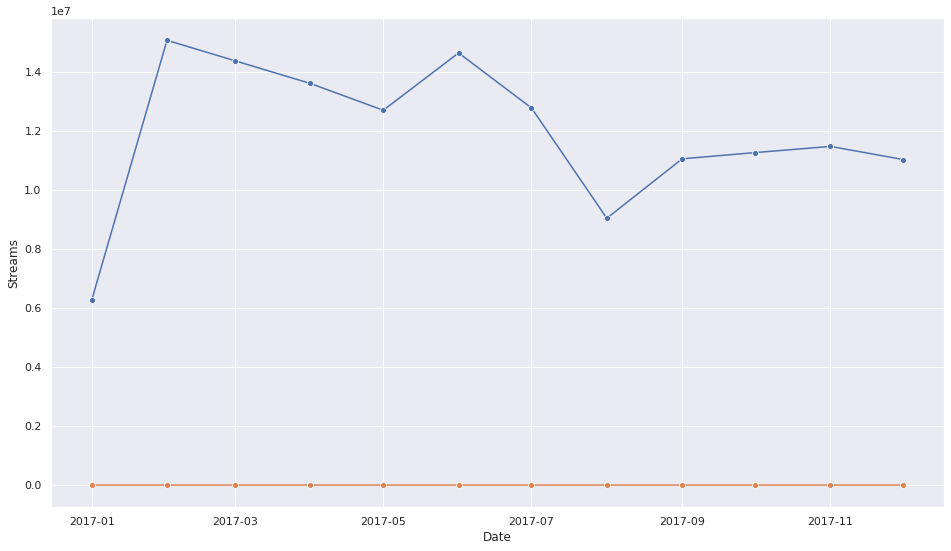

In [269]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data=song_most_streams, x = 'Date', y = 'Streams', marker = 'o', linestyle='-',linewidth = 1.5)
sns.lineplot(data=song_least_streams, x = 'Date', y = 'Streams', marker = 'o', linestyle='-',linewidth = 1.5)

## Part 4: Working with Text Data [14 points]

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**According to the `songs_df` dataframe, what do the reviews for the Top Tracks of 2017 look like?**


###4.1 Tokenizing the text

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [270]:
import nltk
nltk.__version__

'3.7'

In [271]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [272]:
# TODO: tokenize and flatten
def tokenize_content(content):
  token_con = nltk.word_tokenize(content)
  t_text = []
  k = len(token_con)
  for i in range(k):
    if token_con[i].isalnum():
      text_characters = token_con[i].lower()
      if text_characters not in stopwords:
          t_text.append(text_characters)
  return t_text

**TODO**: Also perform the following tasks: 
- Extract the `reviews` column of `songs_df` as a list called `reviews`. 
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`. 
- Flatten the list `top_tokens_list`, and call the resultant list **top_tokens**. The autograder will be examining the contents of this list.

In [273]:
# TODO: tokenize and flatten
reviews = songs_df['reviews']
k = len(reviews)
top_tokens_list = []
for i in range(k):
  token_reviews = reviews[i]
  top_tokens_list.append(tokenize_content(token_reviews))
top_tokens = sum(top_tokens_list,[])

In [274]:
# 2 point
grader.grade(test_case_id = 'test_top_tokens', answer = len(top_tokens))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.2 Most Frequent Words
**TODO**: Now, find the 20 most common words in the list `top_tokens`. Save the result as a list of `(word, count)` tuples, in descending order of `count`.

**Hint**: For this question, you can use `Counter` from the Python `collections` library: https://docs.python.org/2/library/collections.html#counter-objects

In [275]:
from collections import Counter
word_count = Counter(top_tokens)
top_most_common = word_count.most_common(20)

In [276]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.3 Word Clouds [10 points]

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in question 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this. 

*Please make sure your wordcloud has a **white** background.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 10 points. 

In [277]:
# TODO: make a word cloud for top tokens (MANUALLY GRADED)
import matplotlib.pyplot as plt
from wordcloud import wordcloud
word_tokens = str(top_tokens)
word_cl = WordCloud(background_color = 'White').generate(word_tokens)
plt.axis('off')
plt.imshow(word_cl)

# HW Submission

<br>
<center><img src = "https://memegenerator.net/img/instances/73124265/good-job.jpg" width= "500" align ="center"/></center>
<br>

Congratulations on finishing this homework! The good news is that similar to HW1, you basically know your score when you submit to Gradescope. 
However, this time, we will be manually grading your lineplots and wordclouds, so the autograder score is not final! Remember that we will also be checking for plagiarism, so please make sure to cite your sources (if any) by commenting the urls / links you looked at.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Please rerun your notebook on Colab by clicking "Restart and Run-All", and make sure there is nothing wrong with your notebook.
2.   **Double check that you have the correct PennID (all numbers) saved in the autograder**. 
3. Make sure you've run all the PennGrader cells and have received a score.
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py". Please name the `.ipynb` and `.py` files **"homework2.ipynb"** and **"homework2.py"** respectively. Then, upload both the `.py` and `.ipynb` files to Gradescope. 

###Be sure to name your files correctly!!!

**Please let the course staff know ASAP if you have any issues submitting.**